In [158]:
import numpy as np
import matplotlib.pyplot as plt
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.utils import to_categorical
from sklearn.metrics import confusion_matrix
import seaborn as sns
import tensorflow as tf

In [159]:
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [160]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(60000, 28, 28) (60000,)
(10000, 28, 28) (10000,)


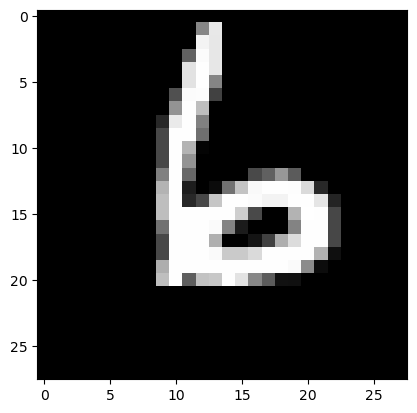

In [161]:
random_nr = np.random.randint(0,60000)
plt.imshow(X_train[random_nr], cmap="grey")
plt.show()

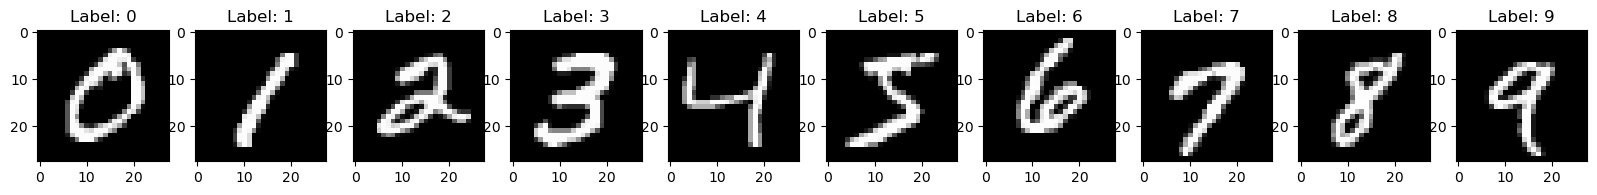

In [162]:
num_classes = 10
fig, ax = plt.subplots(1, num_classes, figsize=(20,20))
for i in range(num_classes):
    sample = X_train[y_train == i][0]
    ax[i].imshow(sample, cmap="grey")
    ax[i].set_title(f"Label: {i}")
plt.show()

# Data Preperation

## Flatering The Data

In [165]:
X_train_flat = X_train.reshape(len(X_train), 28*28)
X_test_flat = X_test.reshape(len(X_test), 28*28)
X_train_flat.shape

(60000, 784)

In [166]:
X_test_flat.shape

(10000, 784)

## Normalize The Data

In [168]:
X_train_norm = X_train_flat.astype("float32")/255
X_test_norm = X_test_flat.astype("float32")/255

## Building The Model

In [170]:
model = Sequential(
    [
        tf.keras.layers.InputLayer((784,)),
        tf.keras.layers.Dense(392, activation="relu", name="L1"), # Just a random number, actually 392=784/2. Hidden Layer 1
        tf.keras.layers.Dense(196, activation="relu", name="L2"), # 196=392/2. Hidden Layer 2
        tf.keras.layers.Dense(49, activation="relu", name="L3"),  # 49=196/2. Hidden Layer 3
        tf.keras.layers.Dense(10, activation="softmax", name="L4") # output layer
    ], name = "my_model"
)
model.compile(
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
    metrics=['accuracy']
)

## Training The Data

In [172]:
history = model.fit(X_train_norm, y_train, epochs=20)

Epoch 1/20
1875/1875 [==============================] - 13s 6ms/step - loss: 0.2049 - accuracy: 0.9383
Epoch 2/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0881 - accuracy: 0.9722
Epoch 3/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0621 - accuracy: 0.9802
Epoch 4/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0470 - accuracy: 0.9855
Epoch 5/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0396 - accuracy: 0.9876
Epoch 6/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0317 - accuracy: 0.9894
Epoch 7/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0267 - accuracy: 0.9916
Epoch 8/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0247 - accuracy: 0.9920
Epoch 9/20
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0192 - accuracy: 0.9939
Epoch 10/20
1875/1875 [==============================] - 13s 7ms/step - l

## Testing on Test Dataset

In [174]:
loss = model.evaluate(X_test_norm, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.1093 - accuracy: 0.9810


In [175]:
print(f"Loss: {round(loss[0]*100,2)}%")
print(f"Accuracy: {round(loss[1]*100,2)}%")

Loss: 10.93%
Accuracy: 98.1%


In [176]:
model.summary()

Model: "my_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 L1 (Dense)                  (None, 392)               307720    
                                                                 
 L2 (Dense)                  (None, 196)               77028     
                                                                 
 L3 (Dense)                  (None, 49)                9653      
                                                                 
 L4 (Dense)                  (None, 10)                500       
                                                                 
Total params: 394901 (1.51 MB)
Trainable params: 394901 (1.51 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________
